In [64]:
import time
inicio = time.time()

# Librerias

In [39]:
!pip install mapie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 2.6 MB/s eta 0:00:00


In [40]:
# Basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from tabulate import tabulate
from numpy import array
import datetime as dt           # Permite trabajar con fechas

# Machine learning packages
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


# Reducción de dimensiones
from sklearn.decomposition import PCA

# Regresión lineal
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Métricas de rendimiento
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Pretty print
from pprint import pprint

#SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Google
from google.colab import files  # Permite descargar archivos directamente desde Colab

# Mapie
from mapie.time_series_regression import MapieTimeSeriesRegressor
from mapie.subsample import BlockBootstrap
from mapie.metrics import regression_coverage_score, regression_mean_width_score



In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

# Preproceso

In [3]:
# split a univariate sequence into samples
def TrainingSet(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [4]:
#cargar datos desde drive acceso libre
FILEID = "143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Departamentos.zip && rm -rf /tmp/cookies.txt
!unzip Departamentos.zip
!dir

--2023-07-21 21:20:57--  https://docs.google.com/uc?export=download&confirm=t&id=143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM
Resolving docs.google.com (docs.google.com)... 172.217.204.102, 172.217.204.139, 172.217.204.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6jviqm5lihvs74rc34lplvfpv7nkt6s/1689974400000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=eccba7c8-7d44-4da8-ba96-5eb893cfafde [following]
--2023-07-21 21:20:57--  https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6jviqm5lihvs74rc34lplvfpv7nkt6s/1689974400000/15940467605774616319/*/143FS8CtU4Wq1C6u43HMYyJC6QqktlZXM?e=download&uuid=eccba7c8-7d44-4da8-ba96-5eb893cfafde
Resolving doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.googleusercontent.com)... 74.125.26.13

In [5]:
ls

 Colombia_Demanda_Horaria.xlsx   Departamentos.zip
 Colombia.xlsx                   sample_data/
 D_Departamental_Horaria.xlsx    Todos_Departamentos_Depurado.xlsx
'Demanda_Caribe Ajustado.xlsx'


In [6]:
df1=pd.read_excel('/content/Colombia_Demanda_Horaria.xlsx')

In [7]:
df1 = df1.drop('Date', axis=1)
# Se establese nuevamente en el indice temporal en la nueva variable 'a', y al DataFrame se incliye la informacion de frecuencia horaria 'H' de la base de datos
date_rng = pd.date_range(start='2000-01-01', end='2023-01-01', freq='H')
# Establece el índice del DataFrame a las fechas generadas
df1.set_index(date_rng[0:-1], inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201624 entries, 2000-01-01 00:00:00 to 2022-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Demand  201624 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


<Axes: xlabel='Date', ylabel='kWh'>

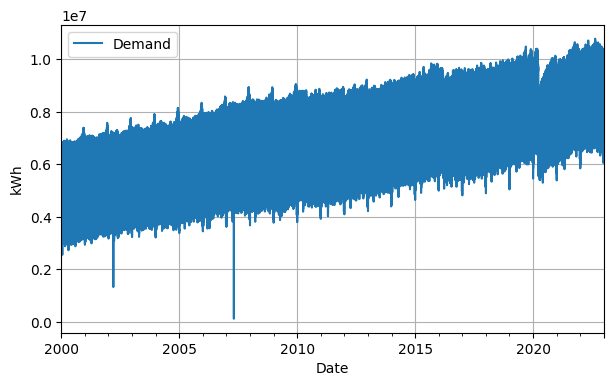

In [27]:
df1.plot(kind='line',figsize=(7,4), grid=True, ylabel='kWh', xlabel='Date',xlim=('2000-01-01','2022-12-31'))

<Axes: xlabel='Date', ylabel='kWh'>

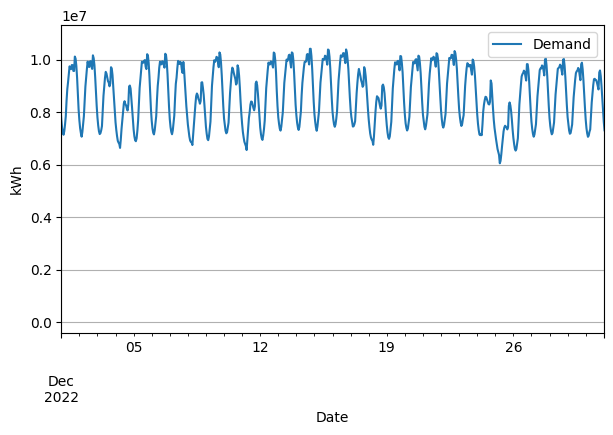

In [28]:
df1.plot(kind='line',figsize=(7,4), grid=True, ylabel='kWh', xlabel='Date',xlim=('2022-12-01','2022-12-31'))

In [11]:
Ts1=df1['2020-10-01':'2022-12-31'].values # Un año
print('Tamaño Serie Horaria: ', len(Ts1))

Tamaño Serie Horaria:  19728


In [12]:
# #  Normalizar
# Ts1 = (Ts1-min(Ts1))/(max(Ts1)-min(Ts1))

#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(Ts1)
Ts1=scaler.transform(Ts1)

# TS= 06

In [14]:
#  Particion X,Y y Time_step/step_back/window
step_back = 6

X1, Y1 = TrainingSet(Ts1,step_back)

#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
X_test1=X_test1.reshape(len(X_test1),step_back)
X_train1=X_train1.reshape(len(X_train1),step_back)

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
Y_test1=Y_test1.reshape(len(Y_test1),1)
Y_train1=Y_train1.reshape(len(Y_train1),1)


In [15]:
print('Tamaño X_train1: ', X_train1.shape, 'Tamaño Y_train1: ', Y_train1.shape, )
print('Tamaño X_test1: ', X_test1.shape, 'Tamaño Y_test1: ', Y_test1.shape, )
print('-----------------------------------------------------------------------')


Tamaño X_train1:  (15777, 6) Tamaño Y_train1:  (15777, 1)
Tamaño X_test1:  (3945, 6) Tamaño Y_test1:  (3945, 1)
-----------------------------------------------------------------------


In [18]:
# Caracteristicos de los modelos a probar
"""
    1. 'scaler': Estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
    2. 'reg': Clasificador
    3. 'scaler': Estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
    4. 'rep': reducción de dimensiones
    5. 'reg': Pueden utilizar clase generada tsne_map()
"""

kernels = [RBF(length_scale=0.001), RBF(length_scale=0.01),  RBF(length_scale=0.1),
           RBF(length_scale=1), RBF(length_scale=10), RBF(length_scale=100)]

models = [
            [('scaler', StandardScaler()),
            ('reg', LinearRegression())],
            [('scaler', StandardScaler()), #Ajustar según ejercicio
            ('reg', Lasso())],
            [('scaler', StandardScaler()),
            ('reg', ElasticNet())],
            [('scaler', StandardScaler()),
            ('reg', SGDRegressor())],
            [('scaler', StandardScaler()),
            ('reg', BayesianRidge())],
            [('scaler', StandardScaler()),
            ('reg', SVR())]
        ]

model_names = ['LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid', 'SVR']

# Parametros de búsqueda por malla
"""
    Parametros n_neighbors debe ser siempre un int
"""

parameters =[{'reg__n_jobs' : [-1, 1, 4]},
             {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000]},
             {'reg__alpha' : [ 0,1e-3,0.1,1,10,100],
              'reg__l1_ratio' : [0, 0,5, 1]},
             {'reg__alpha' : [ 0,1e-3,1e-2,0.1,1],
              'reg__l1_ratio' : [0,0.15, 1]},
             {'reg__alpha_1' : [1e-6, 1e-3, 1],
              'reg__alpha_2' : [1e-6, 1e-3, 1],
              'reg__lambda_1' : [1e-6, 1e-3, 1],
              'reg__lambda_2' : [1e-6, 1e-3, 1]},
             {'reg__kernel' : ['rbf', 'poly'],
              'reg__C' : [0.1, 0.5, 1],
              'reg__epsilon' : [1e-3, 0.1],
              'reg__max_iter' : [10000]}
             ]

In [43]:
forecasting_ML = []
models_ML=[]

for j in range(len(models)):
  # Seleccion de modelo y parámetros
  method = models[j]
  parameter = parameters[j]

  print("Model: {model}".format(model=model_names[j]))

  model = GridSearchCV(Pipeline(method),
                       parameter,
                       cv=5,
                       verbose=5,
                       n_jobs=-1,
                       scoring='neg_mean_absolute_error')

  # Generar modelo
  model.fit(X_train1, Y_train1)
  # Estimar salida conjunto de test
  y_pred = model.predict(X_test1)
  forecasting_ML.append(y_pred)
  models_ML.append(model)

Model: LinearR
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: Lasso
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: Elastic
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model: SGDReg
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Model: BayesRid
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: SVR
Fitting 5 folds for each of 12 candidates, totalling 60 fits


# Salida TS=6

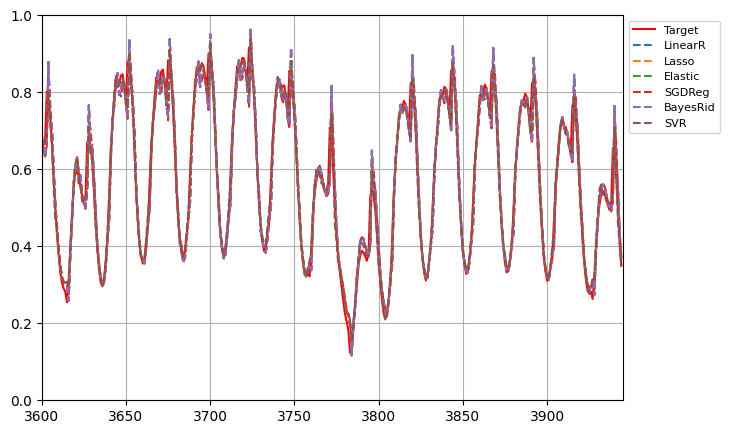

╒═════════════╤════════════╤═══════════╤═══════════╤════════════╤════════════╤════════════╕
│ Metrics     │    LinearR │     Lasso │   Elastic │     SGDReg │   BayesRid │        SVR │
╞═════════════╪════════════╪═══════════╪═══════════╪════════════╪════════════╪════════════╡
│ MSE         │ 0.03934    │ 0.03934   │ 0.03934   │ 0.0414     │ 0.03934    │ 0.02822    │
├─────────────┼────────────┼───────────┼───────────┼────────────┼────────────┼────────────┤
│ RMSE        │ 0.00154737 │ 0.0015473 │ 0.0015473 │ 0.00171427 │ 0.00154736 │ 0.00079646 │
├─────────────┼────────────┼───────────┼───────────┼────────────┼────────────┼────────────┤
│ MAE         │ 0.02705    │ 0.02705   │ 0.02705   │ 0.0296     │ 0.02705    │ 0.01797    │
├─────────────┼────────────┼───────────┼───────────┼────────────┼────────────┼────────────┤
│ R2          │ 0.96163    │ 0.96163   │ 0.96163   │ 0.95749    │ 0.96163    │ 0.98025    │
├─────────────┼────────────┼───────────┼───────────┼────────────┼────────────┼──

In [20]:
plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target', c='r')
for i in range(len(forecasting_ML)):
  plt.plot(forecasting_ML[i], label=model_names[i], linestyle='--')
plt.xlim(3600,len(forecasting_ML[i]))
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()


col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var= ['Metrics','LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid','SVR'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'],['P_Value_Var']

for k in range(6):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_ML[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_ML[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_ML[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_ML[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_ML[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value1 = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_ML[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value1)
  correlation, p_value2 = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_ML[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value2)
  statistic, p_value3 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_ML[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value3)

tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT,P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))


In [30]:
tablas=pd.DataFrame(tablas)
tablas.to_excel("/content/ML_U_6.xlsx")
files.download("/content/ML_U_6.xlsx")

# Conformal TS6


## Data

In [35]:
# Serie 1
X_test = X1[int(len(X1)*0.8):]
X_train = X1[:int(len(X1)*0.8)]
X_test=pd.DataFrame(X_test.reshape(len(X_test),step_back))
X_train=pd.DataFrame(X_train.reshape(len(X_train),step_back))

y_test = Y1[int(len(Y1)*0.8):]
y_train = Y1[:int(len(Y1)*0.8)]
y_test=pd.DataFrame(y_test.reshape(len(y_test),1))
y_train=pd.DataFrame(y_train.reshape(len(y_train),1))
y_test=y_test.squeeze()
y_train=y_train.squeeze()


In [36]:
print('Tamaño X_train1: ', X_train.shape, 'Tamaño y_train1: ', y_train.shape, )
print('Tamaño X_test: ', X_test.shape, 'Tamaño y_test1: ', y_test.shape, )
print('-----------------------------------------------------------------------')


Tamaño X_train1:  (15777, 6) Tamaño y_train1:  (15777,)
Tamaño X_test:  (3945, 6) Tamaño y_test1:  (3945,)
-----------------------------------------------------------------------


## Conformal LinearR

### Linear Conformal

In [44]:
# It's Confromal Prediction time!
alpha = 0.05
gap = 1

mapie_cv = BlockBootstrap(n_blocks=10, overlapping=True, random_state=42)

mapie_enbpi = MapieTimeSeriesRegressor(
    models_ML[0], method="enbpi", cv=mapie_cv, agg_function="mean", n_jobs=-1)
#
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)
y_pred_npfit, y_pis_npfit = mapie_enbpi.predict( X_test, alpha=alpha, ensemble=True, optimize_beta=True)
coverage_npfit = regression_coverage_score( y_test, y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])
width_npfit = regression_mean_width_score(y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])
#
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)

y_pred_pfit = np.zeros(y_pred_npfit.shape)
y_pis_pfit = np.zeros(y_pis_npfit.shape)
conformity_scores_pfit = []
lower_quantiles_pfit = []
higher_quantiles_pfit = []
y_pred_pfit[:gap], y_pis_pfit[:gap, :, :] = mapie_enbpi.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True, optimize_beta=True
)
for step in range(gap, len(X_test), gap):
    mapie_enbpi.partial_fit(
        X_test.iloc[(step - gap) : step, :],
        y_test.iloc[(step - gap) : step],
    )
    (
        y_pred_pfit[step : step + gap],
        y_pis_pfit[step : step + gap, :, :],
    ) = mapie_enbpi.predict(
        X_test.iloc[step : (step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True,
    )
    conformity_scores_pfit.append(mapie_enbpi.conformity_scores_)
    lower_quantiles_pfit.append(mapie_enbpi.lower_quantiles_)
    higher_quantiles_pfit.append(mapie_enbpi.higher_quantiles_)
coverage_pfit = regression_coverage_score(
    y_test, y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0]
)
width_pfit = regression_mean_width_score(y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0])
#

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


### Salida Conformal Linear

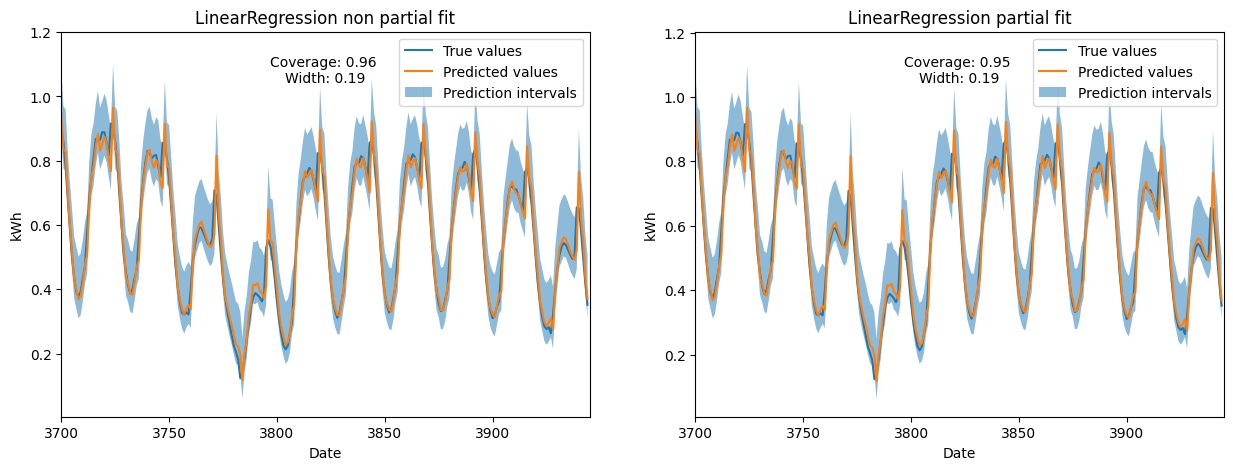

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(y_test.index, y_test, label="True values")
ax1.plot(y_test.index, y_pred_npfit, label="Predicted values")
ax1.fill_between(
    y_test.index,
    y_pis_npfit[:, 0, 0],
    y_pis_npfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax1.set_title("LinearRegression non partial fit")
ax1.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_npfit,2 )} \nWidth: {round(width_npfit,2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax1.transAxes,
)
ax1.set_xlabel("Date")
ax1.set_ylabel("kWh")
ax1.set_xlim(3700,3945)
ax1.legend()

ax2.plot(y_test.index, y_test, label="True values")
ax2.plot(y_test.index, y_pred_pfit, label="Predicted values")
ax2.fill_between(
    y_test.index,
    y_pis_pfit[:, 0, 0],
    y_pis_pfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax2.set_title("LinearRegression partial fit")
ax2.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_pfit,2)} \nWidth: {round(width_pfit, 2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax2.transAxes,
)
ax2.set_xlabel("Date")
ax2.set_ylabel("kWh")
ax2.set_xlim(3700,3945)
ax2.legend()

## Conformal Lasso

### Lasso Conformal

In [49]:
# It's Confromal Prediction time!
alpha = 0.05
gap = 1

mapie_cv = BlockBootstrap(n_blocks=10, overlapping=True, random_state=42)

mapie_enbpi = MapieTimeSeriesRegressor(
    models_ML[1], method="enbpi", cv=mapie_cv, agg_function="mean", n_jobs=-1)
#
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)
y_pred_npfit, y_pis_npfit = mapie_enbpi.predict( X_test, alpha=alpha, ensemble=True, optimize_beta=True)
coverage_npfit = regression_coverage_score( y_test, y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])
width_npfit = regression_mean_width_score(y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])
#
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)

y_pred_pfit = np.zeros(y_pred_npfit.shape)
y_pis_pfit = np.zeros(y_pis_npfit.shape)
conformity_scores_pfit = []
lower_quantiles_pfit = []
higher_quantiles_pfit = []
y_pred_pfit[:gap], y_pis_pfit[:gap, :, :] = mapie_enbpi.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True, optimize_beta=True
)
for step in range(gap, len(X_test), gap):
    mapie_enbpi.partial_fit(
        X_test.iloc[(step - gap) : step, :],
        y_test.iloc[(step - gap) : step],
    )
    (
        y_pred_pfit[step : step + gap],
        y_pis_pfit[step : step + gap, :, :],
    ) = mapie_enbpi.predict(
        X_test.iloc[step : (step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True,
    )
    conformity_scores_pfit.append(mapie_enbpi.conformity_scores_)
    lower_quantiles_pfit.append(mapie_enbpi.lower_quantiles_)
    higher_quantiles_pfit.append(mapie_enbpi.higher_quantiles_)
coverage_pfit = regression_coverage_score(
    y_test, y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0]
)
width_pfit = regression_mean_width_score(y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0])
#

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


### Salida Conformal Lasso

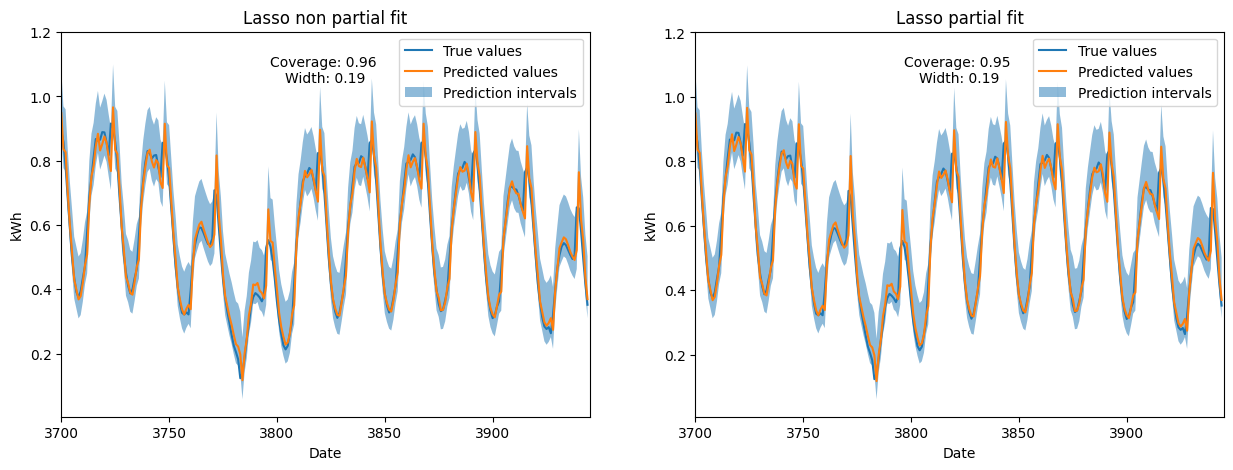

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(y_test.index, y_test, label="True values")
ax1.plot(y_test.index, y_pred_npfit, label="Predicted values")
ax1.fill_between(
    y_test.index,
    y_pis_npfit[:, 0, 0],
    y_pis_npfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax1.set_title("Lasso non partial fit")
ax1.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_npfit,2 )} \nWidth: {round(width_npfit,2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax1.transAxes,
)
ax1.set_xlabel("Date")
ax1.set_ylabel("kWh")
ax1.set_xlim(3700,3945)
ax1.legend()

ax2.plot(y_test.index, y_test, label="True values")
ax2.plot(y_test.index, y_pred_pfit, label="Predicted values")
ax2.fill_between(
    y_test.index,
    y_pis_pfit[:, 0, 0],
    y_pis_pfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax2.set_title("Lasso partial fit")
ax2.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_pfit,2)} \nWidth: {round(width_pfit, 2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax2.transAxes,
)
ax2.set_xlabel("Date")
ax2.set_ylabel("kWh")
ax2.set_xlim(3700,3945)
ax2.legend()

## Conformal SVR

### SVR Conformal

In [53]:
# It's Confromal Prediction time!
alpha = 0.05
gap = 1

mapie_cv = BlockBootstrap(n_blocks=10, overlapping=True, random_state=42)

mapie_enbpi = MapieTimeSeriesRegressor(
    models_ML[5], method="enbpi", cv=mapie_cv, agg_function="mean", n_jobs=-1)
#
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)
y_pred_npfit, y_pis_npfit = mapie_enbpi.predict( X_test, alpha=alpha, ensemble=True, optimize_beta=True)
coverage_npfit = regression_coverage_score( y_test, y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])
width_npfit = regression_mean_width_score(y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])
#
# mapie_enbpi = mapie_enbpi.fit(X_train, y_train)

y_pred_pfit = np.zeros(y_pred_npfit.shape)
y_pis_pfit = np.zeros(y_pis_npfit.shape)
conformity_scores_pfit = []
lower_quantiles_pfit = []
higher_quantiles_pfit = []
y_pred_pfit[:gap], y_pis_pfit[:gap, :, :] = mapie_enbpi.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True, optimize_beta=True
)
for step in range(gap, len(X_test), gap):
    mapie_enbpi.partial_fit(
        X_test.iloc[(step - gap) : step, :],
        y_test.iloc[(step - gap) : step],
    )
    (
        y_pred_pfit[step : step + gap],
        y_pis_pfit[step : step + gap, :, :],
    ) = mapie_enbpi.predict(
        X_test.iloc[step : (step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True,
    )
    conformity_scores_pfit.append(mapie_enbpi.conformity_scores_)
    lower_quantiles_pfit.append(mapie_enbpi.lower_quantiles_)
    higher_quantiles_pfit.append(mapie_enbpi.higher_quantiles_)
coverage_pfit = regression_coverage_score(
    y_test, y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0]
)
width_pfit = regression_mean_width_score(y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0])
#

Fitting 5 folds for each of 12 candidates, totalling 60 fits


### Salida Conformal SVR

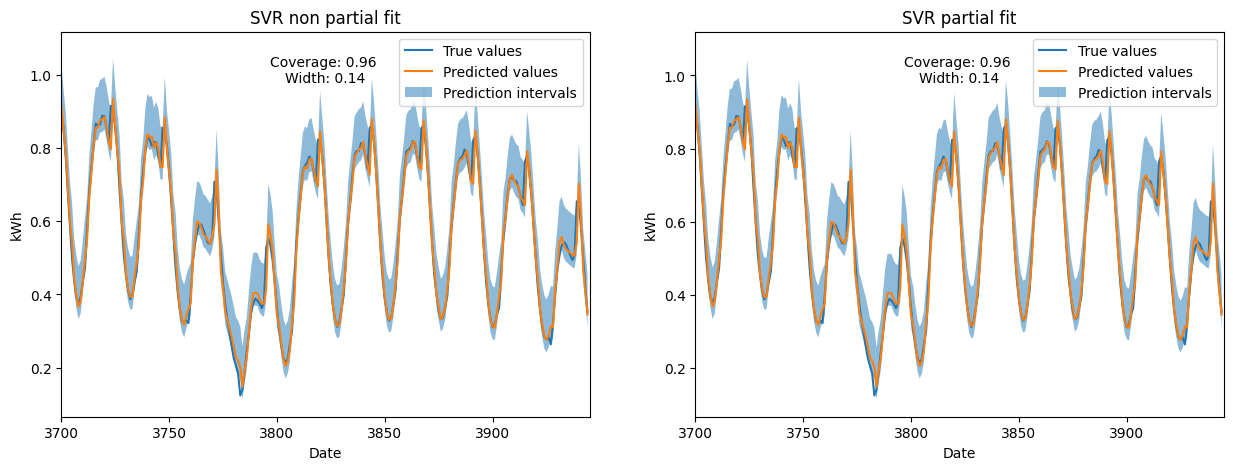

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(y_test.index, y_test, label="True values")
ax1.plot(y_test.index, y_pred_npfit, label="Predicted values")
ax1.fill_between(
    y_test.index,
    y_pis_npfit[:, 0, 0],
    y_pis_npfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax1.set_title("SVR non partial fit")
ax1.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_npfit,2 )} \nWidth: {round(width_npfit,2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax1.transAxes,
)
ax1.set_xlabel("Date")
ax1.set_ylabel("kWh")
ax1.set_xlim(3700,3945)
ax1.legend()

ax2.plot(y_test.index, y_test, label="True values")
ax2.plot(y_test.index, y_pred_pfit, label="Predicted values")
ax2.fill_between(
    y_test.index,
    y_pis_pfit[:, 0, 0],
    y_pis_pfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax2.set_title("SVR partial fit")
ax2.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_pfit,2)} \nWidth: {round(width_pfit, 2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax2.transAxes,
)
ax2.set_xlabel("Date")
ax2.set_ylabel("kWh")
ax2.set_xlim(3700,3945)
ax2.legend()

# TS= 12

## Particion TS=12

In [55]:
#  Particion X,Y y Time_step/step_back/window
step_back = 12

X1, Y1 = TrainingSet(Ts1,step_back)

#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
X_test1=X_test1.reshape(len(X_test1),step_back)
X_train1=X_train1.reshape(len(X_train1),step_back)

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
Y_test1=Y_test1.reshape(len(Y_test1),1)
Y_train1=Y_train1.reshape(len(Y_train1),1)

In [56]:
forecasting_ML2 = []

for j in range(len(models)):
  # Seleccion de modelo y parámetros
  method = models[j]
  parameter = parameters[j]

  print("Model: {model}".format(model=model_names[j]))

  model = GridSearchCV(Pipeline(method),
                       parameter,
                       cv=5,
                       verbose=5,
                       n_jobs=-1,
                       scoring='neg_mean_absolute_error')

  # Generar modelo
  model.fit(X_train1, Y_train1)
  # Estimar salida conjunto de test
  y_pred = model.predict(X_test1)
  forecasting_ML2.append(y_pred)

Model: LinearR
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: Lasso
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: Elastic
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model: SGDReg
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Model: BayesRid
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: SVR
Fitting 5 folds for each of 12 candidates, totalling 60 fits


## Salidas TS=12

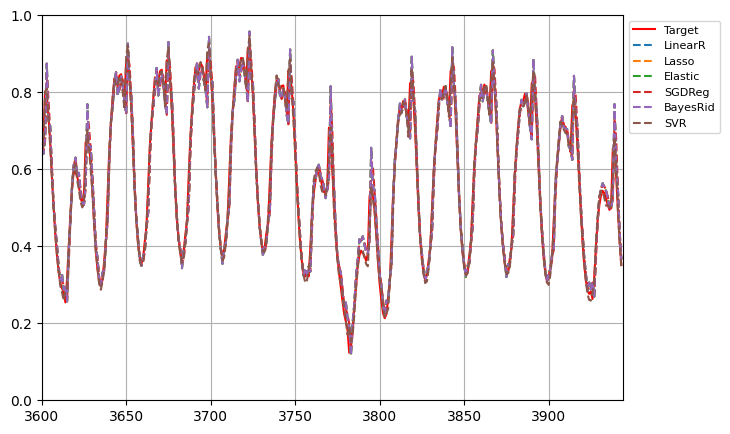

╒═════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤═════════════╕
│ Metrics     │    LinearR │      Lasso │    Elastic │     SGDReg │   BayesRid │         SVR │
╞═════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═════════════╡
│ MSE         │ 0.03866    │ 0.03866    │ 0.03866    │ 0.04107    │ 0.03866    │ 0.01439     │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┤
│ RMSE        │ 0.00149488 │ 0.00149482 │ 0.00149482 │ 0.00168671 │ 0.00149487 │ 0.000207129 │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┤
│ MAE         │ 0.02663    │ 0.02663    │ 0.02663    │ 0.03021    │ 0.02663    │ 0.01025     │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┤
│ R2          │ 0.96294    │ 0.96294    │ 0.96294    │ 0.95819    │ 0.96294    │ 0.99487     │
├─────────────┼────────────┼────────────┼─────────

In [57]:
plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target', c='r')
for i in range(len(forecasting_ML2)):
  plt.plot(forecasting_ML2[i], label=model_names[i], linestyle='--')
plt.xlim(3600,len(forecasting_ML2[i]))
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()


col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var= ['Metrics','LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid','SVR'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'],['P_Value_Var']


for k in range(6):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_ML2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_ML2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_ML2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_ML2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_ML2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value4 = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value4)
  correlation, p_value5 = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value5)
  statistic, p_value6 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value6)


tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))


In [58]:
tablas=pd.DataFrame(tablas)
tablas.to_excel("/content/ML_U_12.xlsx")
files.download("/content/ML_U_12.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TS= 18

## Particion TS=18

In [59]:
#  Particion X,Y y Time_step/step_back/window
step_back = 18

X1, Y1 = TrainingSet(Ts1,step_back)

#  Particion Train_Test

Part = 0.8

# Serie 1
X_test1 = X1[int(len(X1)*0.8):]
X_train1 = X1[:int(len(X1)*0.8)]
X_test1=X_test1.reshape(len(X_test1),step_back)
X_train1=X_train1.reshape(len(X_train1),step_back)

Y_test1 = Y1[int(len(Y1)*0.8):]
Y_train1 = Y1[:int(len(Y1)*0.8)]
Y_test1=Y_test1.reshape(len(Y_test1),1)
Y_train1=Y_train1.reshape(len(Y_train1),1)

In [60]:
forecasting_ML2 = []

for j in range(len(models)):
  # Seleccion de modelo y parámetros
  method = models[j]
  parameter = parameters[j]

  print("Model: {model}".format(model=model_names[j]))

  model = GridSearchCV(Pipeline(method),
                       parameter,
                       cv=5,
                       verbose=5,
                       n_jobs=-1,
                       scoring='neg_mean_absolute_error')

  # Generar modelo
  model.fit(X_train1, Y_train1)
  # Estimar salida conjunto de test
  y_pred = model.predict(X_test1)
  forecasting_ML2.append(y_pred)

Model: LinearR
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Model: Lasso
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Model: Elastic
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model: SGDReg
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Model: BayesRid
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model: SVR
Fitting 5 folds for each of 12 candidates, totalling 60 fits


## Salidas TS=18

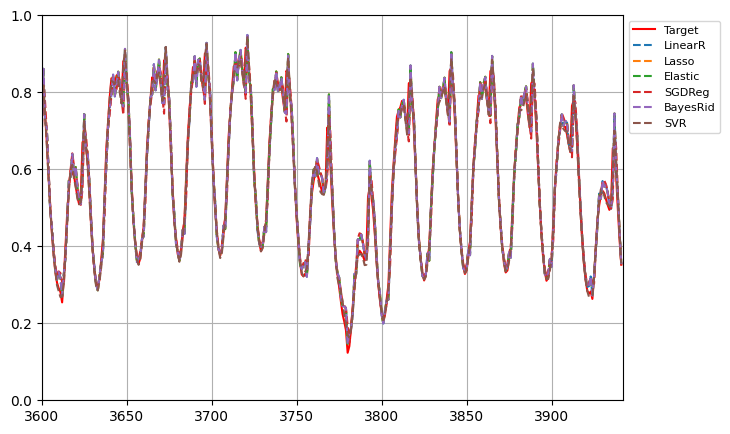

╒═════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤═════════════╕
│ Metrics     │    LinearR │      Lasso │    Elastic │     SGDReg │   BayesRid │         SVR │
╞═════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═════════════╡
│ MSE         │ 0.03245    │ 0.03246    │ 0.03246    │ 0.03679    │ 0.03245    │ 0.01419     │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┤
│ RMSE        │ 0.00105288 │ 0.00105392 │ 0.00105392 │ 0.00135323 │ 0.00105285 │ 0.000201423 │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┤
│ MAE         │ 0.02334    │ 0.02342    │ 0.02342    │ 0.02573    │ 0.02334    │ 0.01015     │
├─────────────┼────────────┼────────────┼────────────┼────────────┼────────────┼─────────────┤
│ R2          │ 0.97391    │ 0.97389    │ 0.97389    │ 0.96647    │ 0.97391    │ 0.99501     │
├─────────────┼────────────┼────────────┼─────────

In [61]:
plt.figure(figsize=(7.5,5))
plt.plot(Y_test1, label='Target', c='r')
for i in range(len(forecasting_ML2)):
  plt.plot(forecasting_ML2[i], label=model_names[i], linestyle='--')
plt.xlim(3600,len(forecasting_ML2[i]))
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='8')
plt.grid()
plt.show()


col_names, MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var= ['Metrics','LinearR', 'Lasso', 'Elastic', 'SGDReg', 'BayesRid','SVR'], ["MSE"], ["RMSE"], ["MAE"], ["R2"],['cnSMAPE'],['P_Value_PS'],['P_Value_TT'],['P_Value_Var']


for k in range(6):
  MSE.append(round(mean_squared_error(Y_test1, forecasting_ML2[k], squared=False),5))
  RMSE.append(mean_squared_error(Y_test1, forecasting_ML2[k], squared=True))
  MAE.append(round(mean_absolute_error(Y_test1, forecasting_ML2[k]),5))
  R2.append(round(r2_score(Y_test1, forecasting_ML2[k]),5))
  mape=mean_absolute_percentage_error(Y_test1, forecasting_ML2[k])
  smape = 2 * mape * 100 / (100 - mape)
  cnSMAPE.append(round(1-(smape/2),5))
  correlation, p_value4 = stats.pearsonr(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
  P_Value_PS.append(p_value4)
  correlation, p_value5 = stats.ttest_ind(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
  P_Value_TT.append(p_value5)
  statistic, p_value6 = bartlett(Y_test1.reshape(len(Y_test1)), forecasting_ML2[k].reshape(len(Y_test1)))
  P_Value_Var.append(p_value6)


tablas = [MSE, RMSE, MAE, R2, cnSMAPE, P_Value_PS, P_Value_TT, P_Value_Var]

print(tabulate(tablas, headers=col_names, tablefmt="fancy_grid"))


In [62]:
tablas=pd.DataFrame(tablas)
tablas.to_excel("/content/ML_U_18.xlsx")
files.download("/content/ML_U_18.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Tiempo

In [65]:
fin = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido = fin - inicio
print("Tiempo transcurrido: ", tiempo_transcurrido, "segundos")

Tiempo transcurrido:  4.145040035247803 segundos
